### 1. 문제정의
- knn모델을 사용하여 붓꽃데이터를 분류하는 실습을 진행해보자
- knn 모델이란? k-nearest neighbors == 유유상종
- 붓꽃이터 : 꽃잎의 길이, 너비, 꽃받침의 길이, 너비
- 특성 활용하여 3가지 품종 구분하는 모델 만들기!


### 2. 데이터 수집

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# 아이리스 데이터셋, sklearn 내부 제공 붓꽃 데이터
from sklearn.datasets import load_iris

In [2]:
# bunch(묶음) 객체 -> 머신러닝 내부 데이터 구조, 딕셔너리처럼 생김
# 활용법도 딕셔너리와 동일

iris_data = load_iris()
iris_data

# data에는 4개의 특성이 들어있음
# target에는 value(label)이 들어있음

# 0, 1, 2 target(label) -> 각 품종을 인덱스 번호로 표시해 둔 것 (순서대로 되어있음)
# 'setosa', 'versicolor', 'virginica'

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 특성(문제) 확인
# 특성 4개의 이름
# label(답) 확인
# label(답) 실제 이름 확인
# iris_data 모든 정보

In [4]:
# 특성(문제) 확인 
# 접근 방법 []
iris_data['data']

# 특성 4개의 이름
iris_data['feature_names']
# 'sepal length (cm)' : 꽃받침의 길이
# 'sepal width (cm)' : 꽃받침의 너비
# 'petal length (cm) : 꽃잎의 길이
# 'petal width (cm)' : 꽃잎의 너비


# label(답) 확인
iris_data['target']
# 0,1,2 -> 3가지의 품종을 의미
# setosa : 0 , versicolor : 1, virginica : 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 데이터셋 구성하기
- 문제 데이터 DataFrame 으로 만들어주기 (정답데이터는 1차원이므로 그대로 사용)
- 문제 (X), 답 (y)
- 훈련, 테스트 셋 분리 (학습용:테스트용, 7:3)

In [5]:
# 문제 데이터 DataFrame화 해주기
X = pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])

# 정답데이터 y에 담기
y = iris_data['target']

# 크기 확인
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
from sklearn.model_selection import train_test_split
# 훈련용 데이터와 테스트 데이터 분리
# 스스로 훈련용과 정답용으로 나눠주는 도구 활용
# train_test_split(문제,답,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# train_test_split의 기능
# 1. train, test 분리
# 2. 랜덤 샘플링 
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
66,5.6,3.0,4.5,1.5
109,7.2,3.6,6.1,2.5
147,6.5,3.0,5.2,2.0
134,6.1,2.6,5.6,1.4
5,5.4,3.9,1.7,0.4


In [7]:
# train_test_split의 기능 중 랜덤 샘플링의 기능으로 계속해서 데이터 랜덤으로 배정
# 학습 데이터가 변경되며 하이퍼 파라미터 변경하는 의미가 없어지게 됨
#랜덤 수 고정 필요 -> random_state -> 수행 시 마다 동일한 결과 얻기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6)

# random_state 가 가지는 숫자는 큰 의미 없음 -> 내부적으로 섞어주는 규칙 중 하나를 고정
X_train.head()

In [8]:
print("훈련용 문제 X: ", X_train.shape, "훈련용 답 y: ",  y_train.shape)
print("테스트용 문제 X: ", X_test.shape, "테스트용 답 y: ", y_test.shape)

훈련용 문제 X:  (105, 4) 훈련용 답 y:  (45, 4)
테스트용 문제 X:  (105,) 테스트용 답 y:  (45,)


### 모델링

In [29]:
# 모델 객체 생성(knn)
model = KNeighborsClassifier(n_neighbors=9)
# 학습 # fit(훈련용문제, 훈련용답)
model.fit(X_train, y_train)
# 예측 ( 예측 결과 보고싶다 -> predict, 정확도만 볼래 -> score )
pre = model.predict(X_test)

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
# 모델 자체에서 제공해주는 정확도 확인 방법
model.score(X_test,y_test)

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9777777777777777

In [30]:
# 평가
accuracy_score(pre, y_test)
# 이웃의 수 : 5 -> 0.97
# 이웃의 수 : 3 -> 0.95

0.9777777777777777

### 반복문을 활용하여 최적의 하이퍼 파라미터 찾기
- knn 모델의 하이퍼파라미터인 이웃의 수 변경, 최적의 정확도 찾아보기

In [39]:
# train, test 데이터의 여러 정확도를 저장할 빈 리스트 생성
train_list = []
test_list = []
n_set=range(1,100)
# 반복문을 활용하여 1~99까지의 이웃값을 넣어 예측
for k in n_set:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    # 정확도 확인
    train_list.append(model.score(X_train,y_train))
    test_list.append(model.score(X_test,y_test))


c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [38]:
print(len(train_list))
print(len(test_list))


99
99


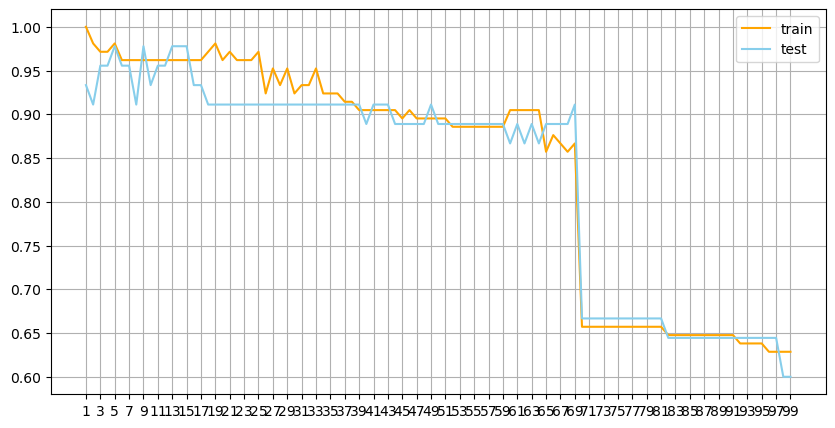

In [56]:
# 결과 한눈에 보기 어려움 -> 시각화를 통해 확인해보자
plt.figure(figsize=(10,5))
plt.plot(n_set, train_list, c='orange', label='train')
plt.plot(n_set, test_list, c='skyblue', label='test')
plt.legend()
# 눈금선
plt.grid()
plt.xticks(range(1,100,2))
plt.show()

### 그래프 해석
- knn 이웃의 수가 작을수록 복잡도 높아짐! ( 과대적합 )
- 이웃의 수가 작은 1의 경우 train 데이터 정확도 1 -> 100% 맞췄다
- 과적합일 가능성이 높다 ( test 데이터에서는 낮은 정확도가 나왔기 때문 )
- 정확도가 비슷하다면 이웃의 수가 작은 하이퍼 파라미터를 추천 : 거리 계산으로 인한 시간과 속도<<
    - 연산 능력의 필요에 따라서 이웃수가 작은 하이퍼 파라미터 선택한다
- 정확도가 높다고 무조건 좋은 것이 아니라, train, test 관계를 살펴보며 사람이 선택
- 무조건 답이 있는 것이 아님!!
